In [1]:
import pandas as pd
import numpy as np

### Importing Dataset

In [2]:
df=pd.read_csv('Fraud.csv')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


step - maps a unit of time in the real world.

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [4]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

There are no null values in the dataset

In [5]:
df[df.isFraud==1]['type'].unique()

array(['TRANSFER', 'CASH_OUT'], dtype=object)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Amount in 10^7')

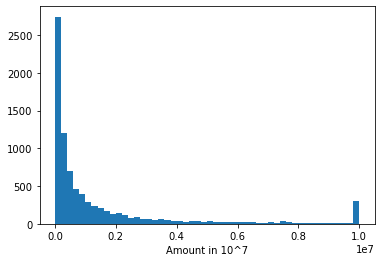

In [7]:
bins=50
plt.hist(df.amount[df.isFraud == 1], bins = bins)
plt.xlabel('Amount in 10^7')

This graph shows the count of fraud transactions in a particular range of transcation amount

We can see that most of the Fraud transactionsare  between 0 and 4000000  

Text(0, 0.5, 'Amount in 10^7')

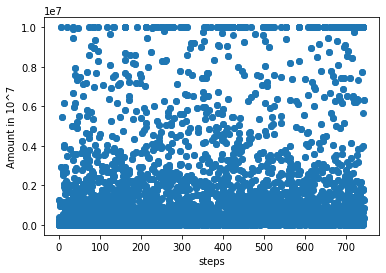

In [8]:
plt.scatter(df.step[df.isFraud == 1], df.amount[df.isFraud == 1])
plt.xlabel('steps')
plt.ylabel('Amount in 10^7')

This scatter plot shows fraud cases w.r.t. step and Amount

This shows that step(Hours) and Amount are not correlated

In [9]:
df['amount'][df['isFraud']==1].max()

10000000.0

In [10]:
(df['oldbalanceOrg']-df['newbalanceOrig']).max()

10000000.000000004

10000000.000000004 is the highest fraud transaction amount 

In [11]:
df[(df['oldbalanceOrg']-df['newbalanceOrig'])==10000000.000000004]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5563707,387,TRANSFER,10000000.0,C1421664654,34892193.09,24892193.09,C1036214683,0.0,0.0,1,0
6266405,617,TRANSFER,10000000.0,C794290057,42542664.27,32542664.27,C262998076,0.0,0.0,1,0
6357390,710,TRANSFER,10000000.0,C671111468,37418265.31,27418265.31,C1728836940,0.0,0.0,1,0


In [12]:
Fraud=df[df['isFraud']==1]

In [13]:
Normal=df[df['isFraud']==0]

In [14]:
Fraud['amount'].describe()  

count    8.213000e+03
mean     1.467967e+06
std      2.404253e+06
min      0.000000e+00
25%      1.270913e+05
50%      4.414234e+05
75%      1.517771e+06
max      1.000000e+07
Name: amount, dtype: float64

### Label Encoding 

In [15]:
One_Hot_Encoding = pd.get_dummies(df['type'])

In [16]:
df_New = pd.concat([df, One_Hot_Encoding], axis=1, join="inner")

In [17]:
df_New.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0,0,1,0,0,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0,0,0,0,0,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0,0,1,0,0,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0,0,0,0,0,1
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0,0,1,0,0,0


In [18]:
df_New=df_New.drop(['type'],axis=1)

In [19]:
df_New['Customer_Type_Start']=df_New['nameOrig'].str[:1]

In [20]:
df_New['Customer_Type_Recipient']=df_New['nameDest'].str[:1]

In [21]:
df_New.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,Customer_Type_Start,Customer_Type_Recipient
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,0,1,0,C,M
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,0,1,0,C,M
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,0,1,C,C
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0,1,0,0,0,C,C
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,0,1,0,C,M


In [22]:
df_New['Customer_Type_Start'].unique()

array(['C'], dtype=object)

In [23]:
df_New['Customer_Type_Recipient'].unique()

array(['M', 'C'], dtype=object)

In [24]:
df_New=df_New.drop(['nameOrig','nameDest','Customer_Type_Start'],axis=1)
#dropping unnecessary coulmns

In [25]:
df_New.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,Customer_Type_Recipient
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,0,1,0,M
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,0,1,0,M
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,0,1,C
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,0,1,0,0,0,C
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,0,1,0,M


In [26]:
df_New = pd.concat([df_New, pd.get_dummies(df_New['Customer_Type_Recipient'])], axis=1, join="inner")

In [27]:
df_New.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,Customer_Type_Recipient,C,M
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,0,1,0,M,0,1
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,0,1,0,M,0,1
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,0,1,C,1,0
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,0,1,0,0,0,C,1,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,0,1,0,M,0,1


In [28]:
df_New=df_New.drop(['Customer_Type_Recipient','TRANSFER','M'],axis=1)
#dropping unnecessary coulmns

In [29]:
df_New.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,C
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,0,1,0,0,1
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,0,1,0


In [30]:
df_New=df_New.drop(['isFlaggedFraud'],axis=1)
#dropping unnecessary coulmns

In [31]:
df_New.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,C
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,1,0,0,1
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,1,0


In [32]:
df_New=df_New.drop(['oldbalanceDest','newbalanceDest'],axis=1)

In [33]:
df_New.head()

,step,amount,oldbalanceOrg,newbalanceOrig,isFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,C
0,1,9839.64,170136.0,160296.36,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0,0,0,0,1,0
2,1,181.00,181.0,0.00,1,0,0,0,0,1
3,1,181.00,181.0,0.00,1,0,1,0,0,1
4,1,11668.14,41554.0,29885.86,0,0,0,0,1,0


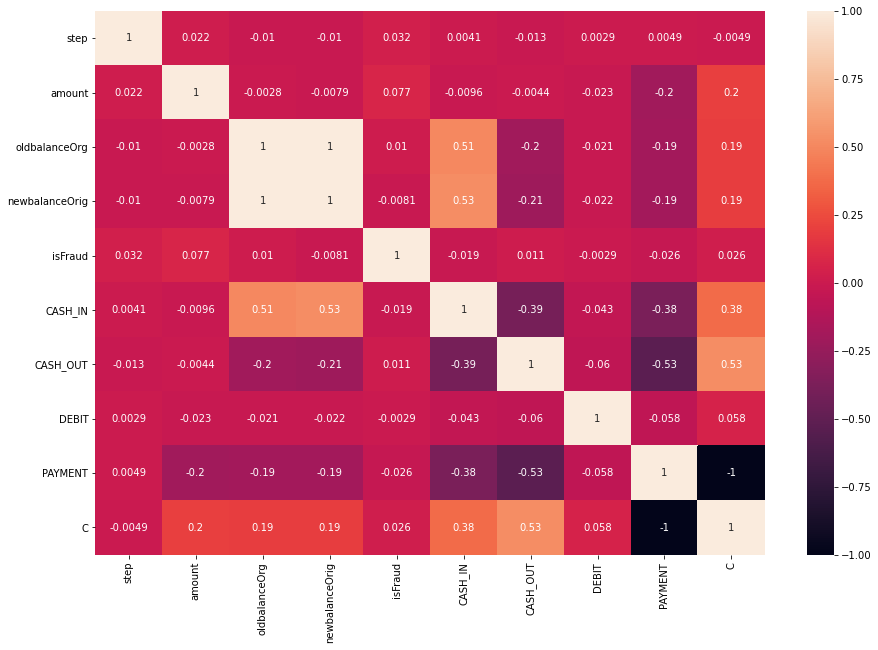

In [34]:
plt.figure(figsize=(15,10))
sns.heatmap(df_New.corr(),annot=True)

In [35]:
X= df_New.drop(['isFraud'],axis=1)

In [36]:
y=df_New['isFraud']

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3) 

In [39]:
X_train.shape

(4453834, 9)

In [40]:
X_test.shape

(1908786, 9)

As the Above Data is very imbalanced to balance it we are using SMOTE(Synthetic Minority Oversampling Technique) 

In [41]:
from imblearn.over_sampling import SMOTE
method = SMOTE()
X_resampled, y_resampled = method.fit_resample(X_train, y_train)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import tree

In [43]:
m1=LogisticRegression()

In [44]:
m1.fit(X_resampled, y_resampled)

LogisticRegression()

In [45]:
predicted = m1.predict(X_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97   1906315
           1       0.02      0.90      0.03      2471

    accuracy                           0.93   1908786
   macro avg       0.51      0.92      0.50   1908786
weighted avg       1.00      0.93      0.96   1908786



In [46]:
m1.score(X_test,y_test)

0.9339852660277265

In [47]:
m2=tree.DecisionTreeClassifier()

In [48]:
m2.fit(X_resampled, y_resampled)

DecisionTreeClassifier()

In [49]:
predicted = m2.predict(X_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906315
           1       0.50      0.91      0.65      2471

    accuracy                           1.00   1908786
   macro avg       0.75      0.95      0.82   1908786
weighted avg       1.00      1.00      1.00   1908786



In [50]:
m2.score(X_test,y_test)

0.9987086032693031

[Text(0.4444444444444444, 0.875, 'X[2] <= 53062.045\ngini = 0.5\nsamples = 8896184\nvalue = [4448092, 4448092]'),
 Text(0.2222222222222222, 0.625, 'X[0] <= 408.5\ngini = 0.277\nsamples = 3600516\nvalue = [3003207, 597309]'),
 Text(0.1111111111111111, 0.375, 'gini = 0.198\nsamples = 3184236\nvalue = [2830190, 354046]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.486\nsamples = 416280\nvalue = [173017, 243263]'),
 Text(0.6666666666666666, 0.625, 'X[3] <= 1.215\ngini = 0.397\nsamples = 5295668\nvalue = [1444885, 3850783]'),
 Text(0.5555555555555556, 0.375, 'gini = 0.089\nsamples = 3952483\nvalue = [183639, 3768844]'),
 Text(0.7777777777777778, 0.375, 'X[1] <= 994339.25\ngini = 0.115\nsamples = 1343185\nvalue = [1261246, 81939]'),
 Text(0.6666666666666666, 0.125, 'gini = 0.003\nsamples = 1262743\nvalue = [1261071, 1672]'),
 Text(0.8888888888888888, 0.125, 'gini = 0.004\nsamples = 80442\nvalue = [175, 80267]')]

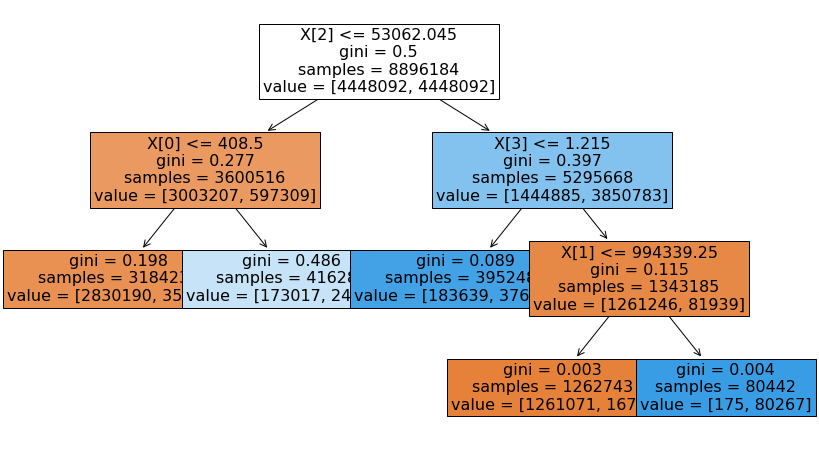

In [51]:
clf = tree.DecisionTreeClassifier(criterion='gini', max_leaf_nodes=5,max_depth=5).fit(X_resampled, y_resampled)
plt.figure(figsize=(14, 8))
tree.plot_tree(clf, filled=True, fontsize=16)

In [52]:
ypre=clf.predict(X_test)

In [53]:
print(classification_report(y_test, ypre))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96   1906315
           1       0.01      0.92      0.03      2471

    accuracy                           0.92   1908786
   macro avg       0.51      0.92      0.49   1908786
weighted avg       1.00      0.92      0.96   1908786



In [54]:
clf.score(X_test,y_test)

0.9194844262269317

There are 3 classification models used Logistic Regression and Decision Tree and Prunned Decision tree

Where Decision Tree Classifier gives better accuracy of 99.87 % than 93.52% of Logistic Regresion model and 91.94% of Prunned Decision tree